# SELECTION PROCESS
---

```julia
versioninfo() # -> v"1.11.2"
```

In [1]:
cd(@__DIR__)

In [2]:
import Pkg; Pkg.activate("..")

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-1`


Let's begin by importing the `Fuzzy` module. `Plots` is used later to draw the membership functions.

In [3]:
using Plots
using Fuzzy

## Input

We denote later by `input` all the plausible values of concern in each particular situation. `input` is often referred to as the universe of discourse or universal set $(u)$.

In [4]:
input = range(0, 10, length = 1000);

## Application

The first criterion to be used in our case is `application`. This latter represents the score given for a submitted application. We thought of using four membership functions to describe the status of any particular submission:
1. Weak
1. Moderate
1. Good
1. Strong

In [5]:
application = Dict(
	"Weak" => TrapezoidalMF(0, 0, 2, 4),
	"Moderate" => TrapezoidalMF(2, 4, 5, 7),
	"Good" => TrapezoidalMF(4, 6, 7, 9),
	"Strong" => TrapezoidalMF(7, 9, 10, 10)
)

Dict{String, TrapezoidalMF} with 4 entries:
  "Strong"   => TrapezoidalMF(7, 9, 10, 10)
  "Moderate" => TrapezoidalMF(2, 4, 5, 7)
  "Weak"     => TrapezoidalMF(0, 0, 2, 4)
  "Good"     => TrapezoidalMF(4, 6, 7, 9)

In order to better understand the fuzzyfication process, let's plot the chart describing `application`.

In [6]:
data_application = chart_prepare(application, input)

Dict{String, Array} with 2 entries:
  "names"  => ["Strong" "Moderate" "Weak" "Good"]
  "values" => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, …

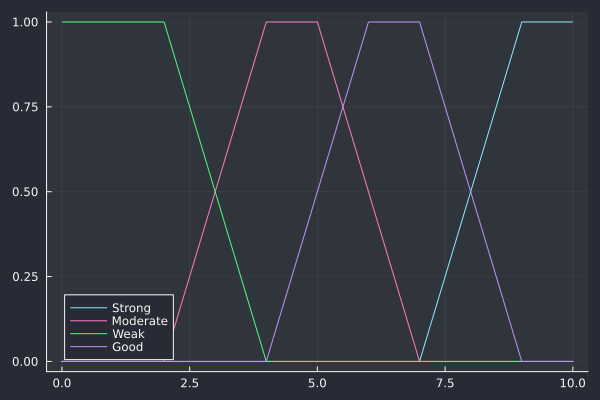

In [7]:
plot(
	input, data_application["values"], 
	label=data_application["names"], 
	legend=:bottomleft
)

## Interview

The variable `interview` describes the score given to an applicant after passing the interview test.

In [8]:
interview = Dict(
	"A" => TriangularMF(0, 0, 2), 
	"B" => TriangularMF(1, 4, 6),
	"C" => TriangularMF(5, 8, 10),
	"D" => TriangularMF(9, 10, 10)
)

Dict{String, TriangularMF} with 4 entries:
  "B" => TriangularMF(1, 4, 6)
  "A" => TriangularMF(0, 0, 2)
  "C" => TriangularMF(5, 8, 10)
  "D" => TriangularMF(9, 10, 10)

In [9]:
data_interview = chart_prepare(interview, input)

Dict{String, Array} with 2 entries:
  "names"  => ["B" "A" "C" "D"]
  "values" => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, …

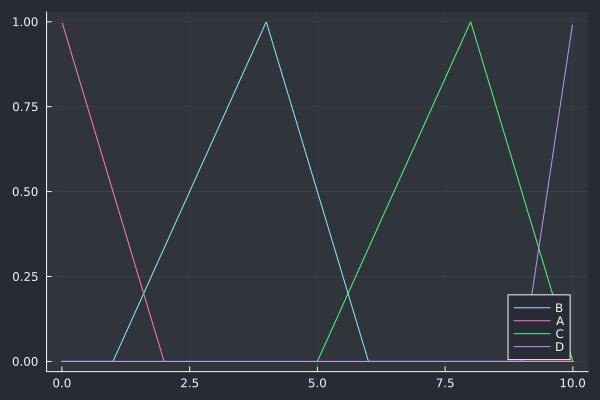

In [10]:
plot(
	input, data_interview["values"], 
	label=data_interview["names"], 
	legend=:bottomright
)

It is time now to design the variable `criteria` which aggregates both `application` and `interview`.

In [11]:
criteria = [application, interview]

2-element Vector{Dict{String}}:
 Dict{String, TrapezoidalMF}("Strong" => TrapezoidalMF(7, 9, 10, 10), "Moderate" => TrapezoidalMF(2, 4, 5, 7), "Weak" => TrapezoidalMF(0, 0, 2, 4), "Good" => TrapezoidalMF(4, 6, 7, 9))
 Dict{String, TriangularMF}("B" => TriangularMF(1, 4, 6), "A" => TriangularMF(0, 0, 2), "C" => TriangularMF(5, 8, 10), "D" => TriangularMF(9, 10, 10))

## Decision

As for the output, we designate by `decision` the final status of any given application.

In [12]:
decision = Dict(
	"Rejected" => TrapezoidalMF(0, 0, 2, 7),
	"Accepted" => TrapezoidalMF(3, 8, 10, 10)
)

Dict{String, TrapezoidalMF} with 2 entries:
  "Accepted" => TrapezoidalMF(3, 8, 10, 10)
  "Rejected" => TrapezoidalMF(0, 0, 2, 7)

In [13]:
data_decision = chart_prepare(decision, input)

Dict{String, Array} with 2 entries:
  "names"  => ["Accepted" "Rejected"]
  "values" => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, …

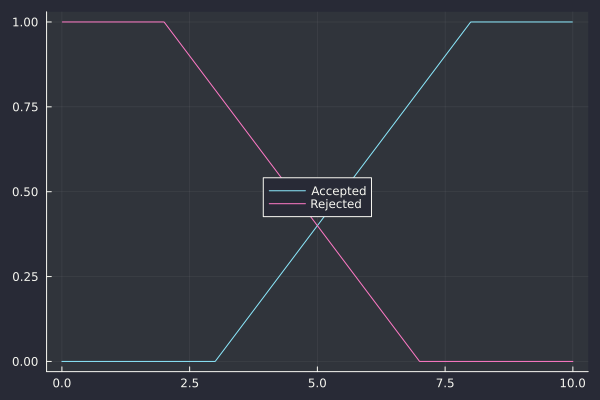

In [14]:
plot(
	input, data_decision["values"], 
	label=data_decision["names"], 
	legend=:inside
)

## Set of Rules

In [15]:
rule_w1 = Rule(["Weak", "A"], "Rejected") 
rule_w2 = Rule(["Weak", "B"], "Rejected")
rule_w3 = Rule(["Weak", "C"], "Rejected")
rule_w4 = Rule(["Weak", "D"], "Accepted")

Rule(AbstractString["Weak", "D"], "Accepted", "MIN")

In [16]:
rule_m1 = Rule(["Moderate", "A"], "Rejected") 
rule_m2 = Rule(["Moderate", "B"], "Rejected")
rule_m3 = Rule(["Moderate", "C"], "Accepted")
rule_m4 = Rule(["Moderate", "D"], "Accepted")

Rule(AbstractString["Moderate", "D"], "Accepted", "MIN")

In [17]:
rule_g1 = Rule(["Good", "A"], "Rejected") 
rule_g2 = Rule(["Good", "B"], "Accepted")
rule_g3 = Rule(["Good", "C"], "Accepted")
rule_g4 = Rule(["Good", "D"], "Accepted")

Rule(AbstractString["Good", "D"], "Accepted", "MIN")

In [18]:
rule_s1 = Rule(["Strong", "A"], "Accepted") 
rule_s2 = Rule(["Strong", "B"], "Accepted")
rule_s3 = Rule(["Strong", "C"], "Accepted")
rule_s4 = Rule(["Strong", "D"], "Accepted")

Rule(AbstractString["Strong", "D"], "Accepted", "MIN")

In [19]:
rules = [
	rule_w1, rule_w2, rule_w3, rule_w4,
	rule_m1, rule_m2, rule_m3, rule_m4,
	rule_g1, rule_g2, rule_g3, rule_g4,
	rule_s1, rule_s2, rule_s3, rule_s4
]

16-element Vector{Rule}:
 Rule(AbstractString["Weak", "A"], "Rejected", "MIN")
 Rule(AbstractString["Weak", "B"], "Rejected", "MIN")
 Rule(AbstractString["Weak", "C"], "Rejected", "MIN")
 Rule(AbstractString["Weak", "D"], "Accepted", "MIN")
 Rule(AbstractString["Moderate", "A"], "Rejected", "MIN")
 Rule(AbstractString["Moderate", "B"], "Rejected", "MIN")
 Rule(AbstractString["Moderate", "C"], "Accepted", "MIN")
 Rule(AbstractString["Moderate", "D"], "Accepted", "MIN")
 Rule(AbstractString["Good", "A"], "Rejected", "MIN")
 Rule(AbstractString["Good", "B"], "Accepted", "MIN")
 Rule(AbstractString["Good", "C"], "Accepted", "MIN")
 Rule(AbstractString["Good", "D"], "Accepted", "MIN")
 Rule(AbstractString["Strong", "A"], "Accepted", "MIN")
 Rule(AbstractString["Strong", "B"], "Accepted", "MIN")
 Rule(AbstractString["Strong", "C"], "Accepted", "MIN")
 Rule(AbstractString["Strong", "D"], "Accepted", "MIN")

## Fuzzy Inference System

In [20]:
fis = FISMamdani(criteria, decision, rules)

FISMamdani(Dict{AbstractString, Fuzzy.MF}[Dict("Strong" => TrapezoidalMF(7, 9, 10, 10), "Moderate" => TrapezoidalMF(2, 4, 5, 7), "Weak" => TrapezoidalMF(0, 0, 2, 4), "Good" => TrapezoidalMF(4, 6, 7, 9)), Dict("B" => TriangularMF(1, 4, 6), "A" => TriangularMF(0, 0, 2), "C" => TriangularMF(5, 8, 10), "D" => TriangularMF(9, 10, 10))], Dict{AbstractString, Fuzzy.MF}("Accepted" => TrapezoidalMF(3, 8, 10, 10), "Rejected" => TrapezoidalMF(0, 0, 2, 7)), Rule[Rule(AbstractString["Weak", "A"], "Rejected", "MIN"), Rule(AbstractString["Weak", "B"], "Rejected", "MIN"), Rule(AbstractString["Weak", "C"], "Rejected", "MIN"), Rule(AbstractString["Weak", "D"], "Accepted", "MIN"), Rule(AbstractString["Moderate", "A"], "Rejected", "MIN"), Rule(AbstractString["Moderate", "B"], "Rejected", "MIN"), Rule(AbstractString["Moderate", "C"], "Accepted", "MIN"), Rule(AbstractString["Moderate", "D"], "Accepted", "MIN"), Rule(AbstractString["Good", "A"], "Rejected", "MIN"), Rule(AbstractString["Good", "B"], "Accepted

Let's make some predictions

In [21]:
test_in = [9., 5.]
eval_fis(fis, test_in)

7.75